In [5]:
import pandas as pd
import numpy as np
import io
import scipy as sp
import scipy.fftpack
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

In [6]:
%%html
<style>
table {display: block; align: left;}
</style>

In [7]:
chanDNSReT = {
    "ReT_180" : 178.12,
    "ReT_395" : 392.24,
    "ReT_590" : 587.19,
    "ReT_1000" : 1000.512,
    "ReT_2000" : 1994.756,
    "ReT_5200" : 5185.897   
}

chanDNSMeans = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_means.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_means.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_means.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_means.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_means.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_means.txt"    
}

chanDNSReys = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_rey.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_rey.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_rey.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_rey.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_rey.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_rey.txt"    
}

chanDNSk = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_k.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_k.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_k.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_k.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_k.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_k.txt"    
}


chanMeans = {}
chanReys = {}
chanK = {}

for key in chanDNSMeans:
    chanMeans[key] = pd.read_csv(chanDNSMeans[key], delim_whitespace=True)
    chanReys[key] = pd.read_csv(chanDNSReys[key], delim_whitespace=True)
    chanK[key] = pd.read_csv(chanDNSk[key], delim_whitespace=True)

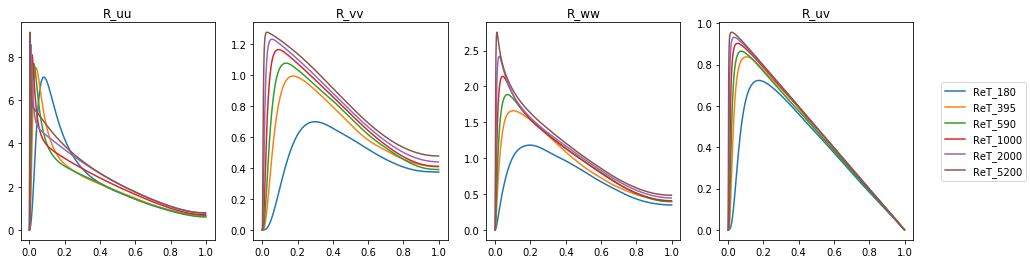

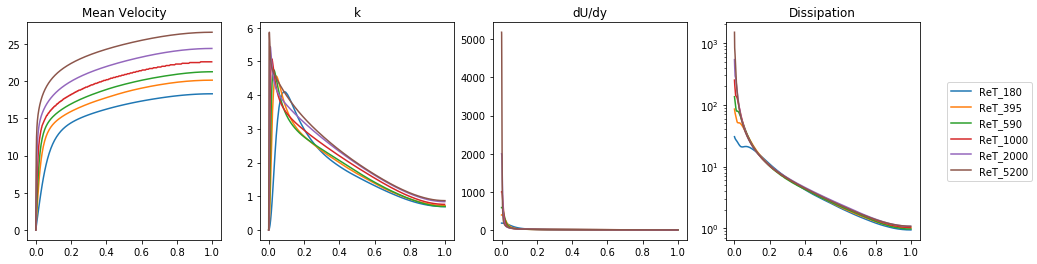

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))


for key in chanReys:
    ax1.plot(chanReys[key]['y'],chanReys[key]['R_uu'])
    ax1.set_title("R_uu")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['R_vv'])
    ax2.set_title("R_vv")
    #ax2.set_xscale('log')
    
    ax3.plot(chanReys[key]['y'],chanReys[key]['R_ww'])
    ax3.set_title("R_ww")
    #ax3.set_xscale('log')
    
    ax4.plot(chanReys[key]['y'],-1*chanReys[key]['R_uv'])
    ax4.set_title("R_uv")
    #ax4.set_xscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

for key in chanMeans:
    ax1.plot(chanMeans[key]['y'],chanMeans[key]['Umean'])
    ax1.set_title("Mean Velocity")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k'])
    ax2.set_title("k")
    #ax2.set_xscale('log')
    
    ax3.plot(chanMeans[key]['y'],chanMeans[key]['dUmean/dy'])
    ax3.set_title("dU/dy")
    #ax3.set_yscale('log')
    
    ax4.plot(chanK[key]['y'],chanK[key]['dissip']*chanDNSReT[key])
    ax4.set_title("Dissipation")
    ax4.set_yscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanMeans.keys()
fig.legend(handles, labels, loc='center right')

plt.show()

## Y+ Values For Channel Flow

For $Re_{\tau}$ of 395, 2000, and 18000 there are minimum y values near the wall for each case respectively. 

$ y^+ \equiv \dfrac{u^* y}{\nu} $

$ u^* = \sqrt{\nu \dfrac{\partial u}{\partial y}\bigg|_w}$

So for a $y^+ = 1$, given $u^* = 1$ (choosing $\nu$ to be $1/\tfrac{\partial u}{\partial y}|_w$, then y is equal to the numerical value of $\nu$


## Mesh Sizes For Channel Flow

Channel size (following Gritskevitch) is H=2 in the y direction, and 4H in the x (streamwise) direction, and 1.5H in the z (spanwise) direction.

| $Re_{\tau}$   | $\Delta x$  | $x_n$ | $\Delta y$ | $y_n$ | $\Delta z$ | $z_n $ | $y_w$  |
|---|---|---|---|---|---|---|---|
| 395  | 0.1 | 80 | Variable  | 128 | 0.05 | 60 | 0.00253 |
| 2000  | 0.1 | 80 | Variable  | 192 | 0.05 | 60 | 0.0005 |
| 18000  | 0.1 | 80 | Variable | 256 | 0.05 | 60 | 5.556e-5  |
